<a href="https://colab.research.google.com/github/SiddharthVijayVargiya/SiddharthVijayVargiya/blob/main/Tensorflow_certification_practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import EfficientNetB0

In [ ]:

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("Training Data:" ,x_train.shape)
print("Test data", x_test.shape)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

Training Data: (60000, 28, 28)
Test data (10000, 28, 28)


In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [ ]:
model = keras.Sequential([
                          keras.Input(shape=(28,28,1)),
                          layers.Conv2D(filters=10,kernel_size=(3, 3),padding='valid',activation='relu'),
                          layers.MaxPooling2D(pool_size=(2, 2)),
                          layers.Conv2D(filters=20,kernel_size=(3, 3),padding='valid',activation='relu'),
                          layers.MaxPooling2D(pool_size=(2, 2)),
                          layers.Flatten(),
                          layers.Dense(units=512, activation='relu'),
                          layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy'],
)



In [ ]:
hist = model.fit(x_train, y_train , epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 36s 21ms/step - loss: 0.1467 - accuracy: 0.9539 - val_loss: 0.0538 - val_accuracy: 0.9850
Epoch 2/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0529 - accuracy: 0.9839 - val_loss: 0.0511 - val_accuracy: 0.9865
Epoch 3/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0391 - accuracy: 0.9884 - val_loss: 0.0588 - val_accuracy: 0.9850
Epoch 4/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0520 - val_accuracy: 0.9863
Epoch 5/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.0394 - val_accuracy: 0.9887
Epoch 6/10
1688/1688 [==============================] - 36s 21ms/step - loss: 0.0233 - accuracy: 0.9934 - val_loss: 0.0454 - val_accuracy: 0.9888
Epoch 7/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0205 - accuracy: 0.9938 - val_loss: 0.0594 -

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0475 - accuracy: 0.9879


[0.04754234850406647, 0.9879000186920166]

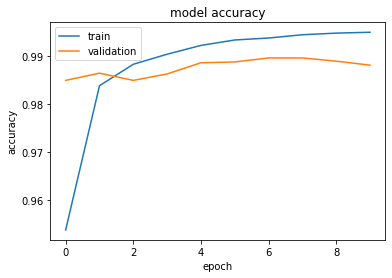

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(hist)

In [ ]:
pred = model.predict(x_test)

In [ ]:
tf.argmax(pred[i]) != tf.argmax(y_test[i])

<tf.Tensor: shape=(), dtype=int64, numpy=7>

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
indices = [i for i,v in enumerate(pred) if tf.argmax(pred[i])!=tf.argmax(y_test[i])]
subset_of_wrongly_predicted = [x_test[i] for i in indices ]

In [ ]:
tf.argmax(pred[18])

<tf.Tensor: shape=(), dtype=int64, numpy=5>

In [ ]:
tf.argmax(y_test[18])

<tf.Tensor: shape=(), dtype=int64, numpy=3>